# Shark Attack Project - Team 1

-------

## 1. Introduction

The objective of this project is to analyze the data from the shark attack dataset and to prove these hypotheses:

1. The US has more shark attacks than other countries.
2. Mork Shark attacks in the US happen during the summer season.
3. In the US, the White shark is the most dangerous species. 

## 2. Collect the Data

First of all, we need to import the pandas and numpy library in order to use the functions and methods in Python. We also need to import matplotlib.pyplot library in order to create visualization in Python, such as plots and charts. 

We need then to call the dataset which we get from this website: 
https://www.sharkattackfile.net/incidentlog.htm

The data is in an Excel file, therefore, we need to use one of functions in the pandas library to read the Excel file by using read_excel method. The data then will be read in Python as a DataFrame.
In order to use the data from the original DataFrame without changing anything, we need to use .copy() method. This method will create a copy of the original DataFrame. Thus, the data cleaning and manipulation that we will do for the analysis will not influence the original DataFrame. 

### Data

The dataset used in this project is the Global Shark Attack File, which contains information about shark attacks from 1900 to 2016. The dataset has several columns, which consist of:

- Date - date when the injury recorded.
- Year - year of injury happened.
- Type - type of incidents.
- Country - country where the injury happened.
- State - state where the injury happened.
- Location - location where the injury happened. 
- Activity - activity that the victim did when the injury happened.
- Name - name of the victim.
- Sex - gender of the victim.
- Age - age of the victim.
- Injury - type of injury.
- Time - time when the injury happened.
- Species - species of the shark which attacked the victim.
- Source - source of information of the shark attack.
- Some unknowns - unknowns columns which exist from the data source.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

In [2]:
url = "https://www.sharkattackfile.net/spreadsheets/GSAF5.xls"
original_df = pd.read_excel(url)

In [3]:
# create working copy of original dataframe
df = original_df.copy()

## 3. Clean the data

In this section, we would like to explain about the data cleaning process.

### 3.1. Identify the Data

We need to understand the DataFrame by viewing the first three rows of our DataFrame. We can do this by using .head() method. After that, we check the number of rows and columns in the DataFrame using .shape method. The first output of this method indicates the number of rows and the second output shows the number of columns.

Furthermore, we use .columns method to understand all columns name in the DataFrame. This will help us to see the format of the column names and correct them if necessary.

In [4]:
# get first impression of dataset
df.head(3)

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,15 Mar 2024,2024.0,Unprovoked,AUSTRALIA,Queensland,Bargara Beach,Swimming,Brooklyn Sauer,F,13,...,Tiger shark,"Yahoo News, 3/15/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,04 Mar 2024,2024.0,Unprovoked,USA,Hawaii,"Old Man's, Waikiki",Surfing,Matthew White,M,NaN,...,Tiger shark 8',"Surfer, 3/6/2024F",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,02 Mar-2024,2024.0,Unprovoked,USA,Hawaii,"Rainbows, Oahu",Swimming,NaN,F,11,...,3' to 4' shark,"Hawaii News Now, 3/4/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape

(6969, 23)

In [6]:
# check column names
df.columns

Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Unnamed: 11', 'Time', 'Species ',
       'Source', 'pdf', 'href formula', 'href', 'Case Number', 'Case Number.1',
       'original order', 'Unnamed: 21', 'Unnamed: 22'],
      dtype='object')

### 3.2. Clean the data

After identifying the data, we notice that column name 'Species ' has a whitespace on the right side of the name, we want to remove the whitespice with .rename method. Here we rename it into 'Species'.

We then decide to select and retain only specific columns for our analysis which we believe will be useful to answer our research questions. We reassign DataFrame `df` to include only columns specified in the list and the rest of the columns will be discarded. 

#### Removing missing values

In this step, we want to remove rows from the DataFrame that contain only missing values (NaNs) with .dropna method. 'how='all'' is used to specified that only rows in all columns are NaN would be dropped.
After dropping the missing values, we then check the number of rows after performing this method with .shape method which gives us insight on the number of rows and columns of the current DataFrame.

Furthermore, we want to remove missing values (NaNs) from the Year column. So, we use again the .dropna method and subset Year for this method. 
After that, since we notice that the the variables in Year column is a float type, we convert it into integer type with .astype method. To ensure that the methods assigned properly into our DataFrame, we take a brief view of the DataFrame with .head method.

In [7]:
# remove whitespace behind column name for species
df = df.rename(columns = {"Species ": "Species"})

In [8]:
# choose certain variables that we are of interest for our problem statement
df = df[["Date", "Year", "Country", "Species"]]

In [9]:
# drop all rows where all columns are NaN
df = df.dropna(how='all')
df.shape

(6944, 4)

In [10]:
# drop all rows where 'Year' is NaN
df = df.dropna(subset = ['Year'])
df.head()

,Date,Year,Country,Species
0,15 Mar 2024,2024.0,AUSTRALIA,Tiger shark
1,04 Mar 2024,2024.0,USA,Tiger shark 8'
2,02 Mar-2024,2024.0,USA,3' to 4' shark
3,25 Feb-2024,2024.0,AUSTRALIA,Tiger shark
4,14 Feb-2024,2024.0,INDIA,"Bull shark, 7'"


In [11]:
# correct the way the Years are written (for example 2023.0 to 2023) [from string to integer]
df['Year'] = df['Year'].astype(int)
df.head(3)

,Date,Year,Country,Species
0,15 Mar 2024,2024,AUSTRALIA,Tiger shark
1,04 Mar 2024,2024,USA,Tiger shark 8'
2,02 Mar-2024,2024,USA,3' to 4' shark


#### Taking the past 10 years data

In order to confirm our first hypothesis that USA has more shark attacks than other countries, we decide that we will use the data of the past 10 years. 

First, we filter our Year column to be equal and more than 2015. We check the filtered year and count the data on each year with .value_counts method. We decide 

Then, we want to see the amount of Shark attack in top five countries in the world. We do that by using .value_counts method and assigning the first five data. For the rest of the data, we store them in 'others' variable. 

Lastly, we visualize the analysis of Shark attack in the past 10 years in the worlds into a pie chart with .plot.pie method. The data will be shown in the chart in percentage, therefore, we use autopct parameter to format the labels.

It proved the hypothesis that the US has more shark attacks than other countries.

In [12]:
# only consider last 10 years
df = df[(df['Year'] >= 2015)]

In [13]:
# check which countries have high incident number
df.Country.value_counts()[0:5]

USA             508
AUSTRALIA       248
BAHAMAS          43
SOUTH AFRICA     43
BRAZIL           21
Name: Country, dtype: int64

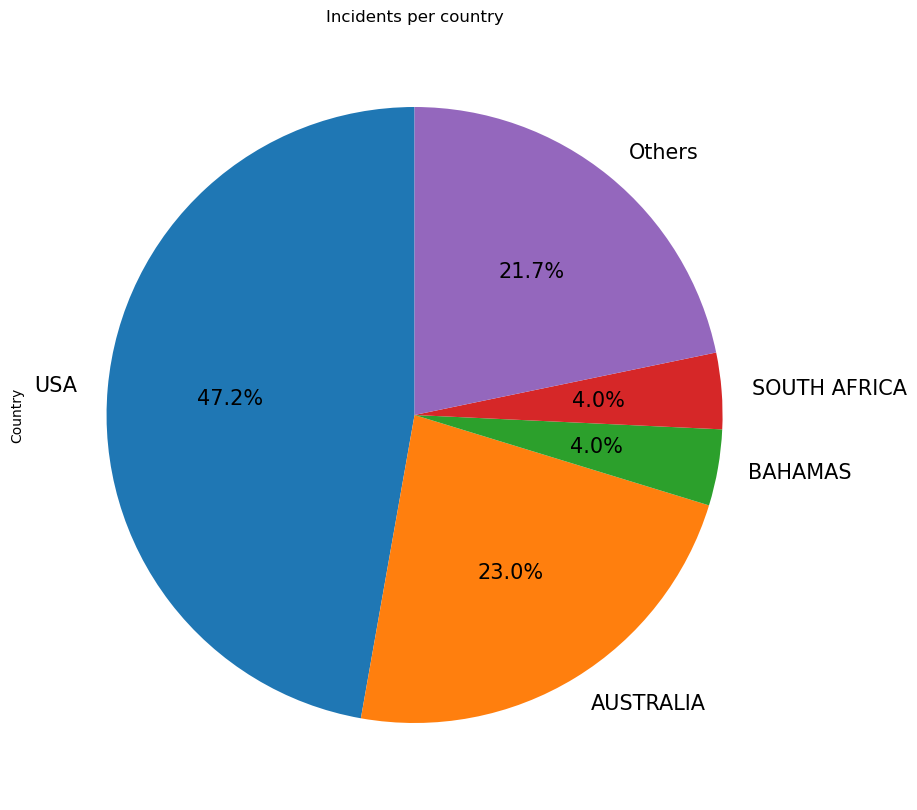

"\n\nThe lambda function lambda p: '{:.0f}'.format(p * total / 100) calculates the count by applying the percentage to the total sum and formats it as an integer. \nThis way, the pie chart will display the actual counts instead of percentages.\n\n"

In [14]:
#Make a piechart of the top 4 countries with the most incidents, and a fifth slice representing the rest

top_4 = df.Country.value_counts()[0:4]
others = df.Country.value_counts()[4:].sum()

#Make a piechart of the top 4 countries with the most incidents, and a fifth slice representing the rest

top_4 = df.Country.value_counts()[0:4]
others = df.Country.value_counts()[4:].sum()

top_4['Others'] = others

top_4.plot.pie(autopct='%1.1f%%', startangle=90, title='Incidents per country', figsize=(10,10),fontsize= 15)
plt.show()

#For future knowledge the autopct parameter is used to format the percentage of the pie chart.

"""

The lambda function lambda p: '{:.0f}'.format(p * total / 100) calculates the count by applying the percentage to the total sum and formats it as an integer. 
This way, the pie chart will display the actual counts instead of percentages.

"""


In [15]:
#Only consider incidents in USA

df_usa = df.loc[df['Country'] == 'USA'].copy()

#### Formating the Date column

In order to understand whether more shark atacks in the US happen during the summer season, we need to be able to see the month when the attack happens. In this case, we decide to take the month from the Date column. 

We first need to create a new dataframe that focuses only on shark attack in the US with .loc attributes.

After that, we use regular expressions to search and match the pattern that we want to find. In this case, we use to removes all whitespaces, commas, and hyphens from the date. We also use .apply method to apply the lambda function into Date column. 

Since the parameters in Date column is in string type, we need to convert it into datetime with .to_datetime method. We also use `errors='coerce'` parameter to handle errors that may arrise. In addition, we reset the index as well to avoid any misunderstanding.

In [16]:
#Formating the date column

# The first lambda function removes all whitespaces, commas, and hyphens from the date | Using regex -
df_usa['Date'] = df_usa['Date'].apply(lambda x: re.sub(r'[-\s,]', '', str(x)))

# The second lambda function adds a hyphen after the first four digits
df_usa['Date'] = df_usa['Date'].apply(lambda x: re.sub(r'(\d{4})', r'\1-', str(x)))

# The third lambda function converts the month into a numerical value
df_usa['Date'] = pd.to_datetime(df_usa['Date'], errors='coerce') 

# The fourth lambda function formats the date to 'dd-mm-yy' | Also here the date is converted to a string(object) in order to apply the strftime method.
df_usa['Date'] = df_usa['Date'].dt.strftime('%d-%m-%y')

# Convert the 'Date' column back to datetime format
df_usa['Date'] = pd.to_datetime(df_usa['Date'], format='%d-%m-%y', errors='coerce')

reset_index = df_usa.reset_index(drop=True)

df_usa.head(10)

,Date,Year,Country,Species
1,2024-03-04,2024,USA,Tiger shark 8'
2,2024-03-02,2024,USA,3' to 4' shark
10,2023-12-30,2023,USA,NaN
24,2023-11-05,2023,USA,NaN
29,2023-10-25,2023,USA,8' tiger shark
33,2023-10-15,2023,USA,10' tiger shark
34,2023-10-13,2023,USA,NaN
35,2023-10-02,2023,USA,10' to 12' Galapagos shark
37,2023-10-01,2023,USA,NaN
38,2023-09-18,2023,USA,NaN


In [17]:
df_usa.Date[0:3]

1    2024-03-04
2    2024-03-02
10   2023-12-30
Name: Date, dtype: datetime64[ns]

#### Grouping the month into its season

After we get the month of the incidents, we group it into four seasons (Winter, Spring, Summer, and Fall) and if there is missing value, we will group it as Unknown just to understand its existence. We will drop the missing values in the end. 

We then check how many incidents happen in every season by using .sum method. In addition, we visualize this finding into a bar chart and use .patch to add label on top of the bar chart. This finding shows us that the shark attacks happen the most in summer, which proves our hypothesis.

In [18]:
def get_season(Date):
    if pd.isna(Date):
        return 'Unknown'
    month = pd.to_datetime(Date).month #Convert Date to datetime object and extract the month
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'

df_usa['Season'] = df_usa['Date'].apply(get_season)

df_usa.head(3)


,Date,Year,Country,Species,Season
1,2024-03-04,2024,USA,Tiger shark 8',Spring
2,2024-03-02,2024,USA,3' to 4' shark,Spring
10,2023-12-30,2023,USA,NaN,Winter


In [19]:
df_usa["Date"].loc[df_usa.Season == "Unknown"]

72    NaT
384   NaT
456   NaT
597   NaT
Name: Date, dtype: datetime64[ns]

In [20]:
#Grouping by 'Season' and 'Year' and counting the occurrences

grouped_season = df_usa.groupby(['Season', 'Year']).size().unstack(fill_value=0)

#We had a last column where we summed all the occurrences of shark attacks in the USA

grouped_season['Total sum'] = grouped_season.sum(axis=1)

#The error= 'coerce' found 5 date formats that were not converted correctly, so they will show as "Unknown" in the 'Season' column, and will not be considered in the analysis.

grouped_season = grouped_season.drop('Unknown')

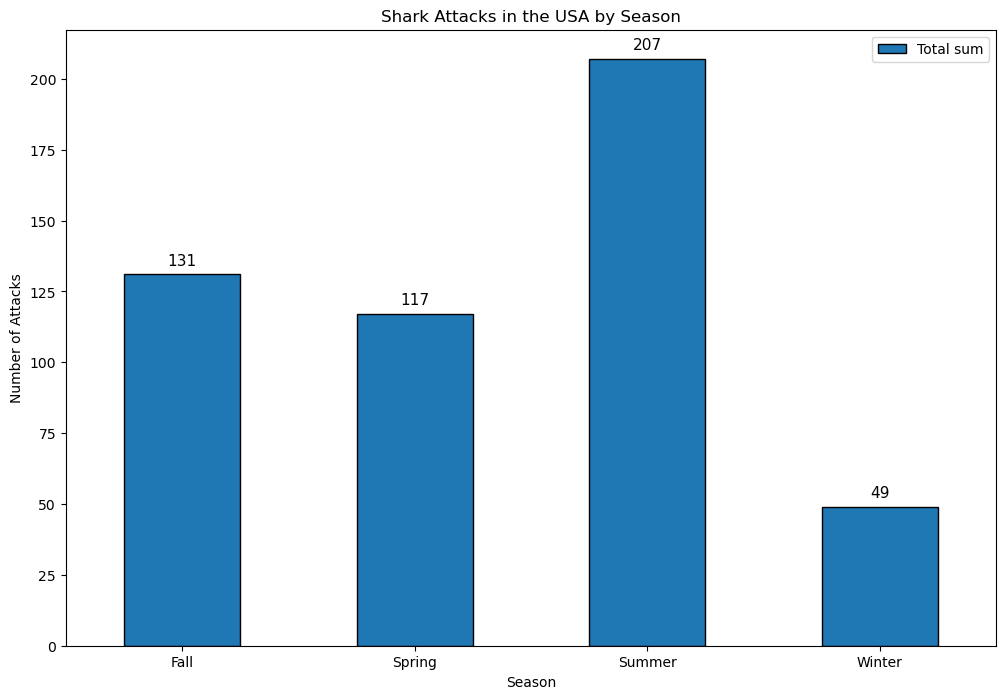

In [21]:
# Plotting the stacked bar chart using just the Season and total columns, and show the number on top of each bar

#Color blue ocean shades

blues_hades = ['#1f77b4', '#66b3ff', '#3399ff', '#1a75ff']

# Create the bar plot

ax = grouped_season[['Total sum']].plot(kind='bar', stacked=True, figsize=(12, 8), color=blues_hades, edgecolor='black')

# Add values for each season on top of each bar

"""
The for loop iterates over each bar in the plot.

f'{p.get_height()}': The height value is formatted as a string using an f-string.
p.get_x() + p.get_width() / 2.: The x-coordinate is calculated by adding the x-coordinate of the bar and half of its width.
p.get_height(): The y-coordinate is the height of the bar.
ha='center': The horizontal alignment is set to center.
va='center': The vertical alignment is set to center.
xytext=(0, 10): The text is placed 5 points above the bar.
textcoords='offset points': The text is offset by points.
fontsize=12: The font size is set to 12.

"""

for p in ax.patches: #Patches in matplotlib are the objects that we can see in the plot, like bars, lines, etc.
    ax.annotate(f'{int(p.get_height())}', 
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center', 
            va='center', 
            xytext=(0, 10), 
            textcoords='offset points', 
            fontsize=11, 
            color='black')


# Set plot title and labels
plt.title('Shark Attacks in the USA by Season')
plt.ylabel('Number of Attacks')
plt.xlabel('Season')
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.show()


#### Standardizing shark species' names

We now want to analyse the most dangerous shark species in the US. However, we realize that we first need to normalize all data in the Species column into lowercase, so, we use .lower() method and assign the name of specific species. Moreover, if there is missing value, we will specify them as "Not Specified". For non-string type data, we will call them as "Others". After that, we check the data in each species by using .value_counts() method. 
Finally, we visualize the data in a bar chart using seaborn library. As can be seen from the figure, white shark proves to be the most dangerous shark in the US confirming our hypothesis. 

In [22]:
# replace NaNs in Species by "Not Specified"
df_usa.Species.fillna("Not Specified", inplace=True)

#Standardize the species names
df_usa['Species'] = df_usa['Species'].apply(lambda x: "White Shark" if "white shark" in str(x).lower() else x)
df_usa['Species'] = df_usa['Species'].apply(lambda x: "Tiger Shark" if "tiger shark" in str(x).lower() else x)
df_usa['Species'] = df_usa['Species'].apply(lambda x: "Bull Shark" if "bull shark" in str(x).lower() else x)
df_usa['Species'] = df_usa['Species'].apply(lambda x: "Nurse Shark" if "nurse shark" in str(x).lower() else x)
df_usa['Species'] = df_usa['Species'].apply(lambda x: "Blacktip Shark" if "blacktip shark" in str(x).lower() else x)
df_usa['Species'] = df_usa['Species'].apply(lambda x: x if str(x) in df_usa.Species.value_counts().head(7).index else "Others")

Text(0.5, 1.0, 'Shark attacks in the US per species')

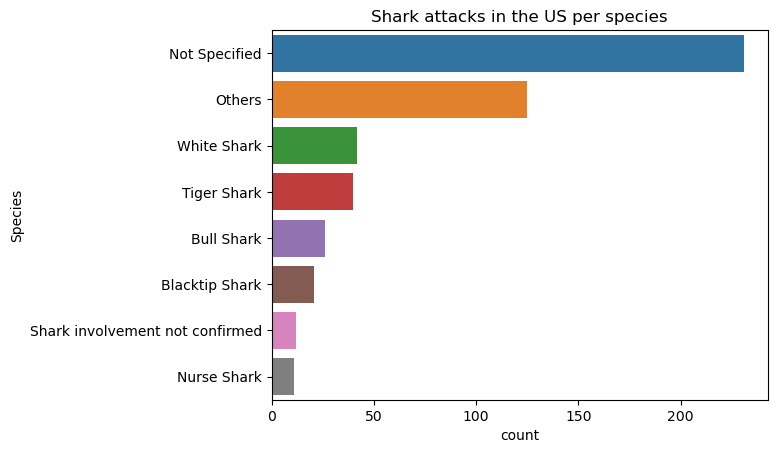

In [23]:
fig = sns.countplot(y = "Species", data = df_usa, order = df_usa["Species"].value_counts().index)
fig.set_title('Shark attacks in the US per species')

## 4. Conclusions

The analysis on the shark attack data has proved our hypotheses that the US has more shark attacks than other countries and the attacks happen the most in summer. Furthermore, it is proven that White shark is the most dangerous species in the US.